#### importing the required libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L1,L2 

#### importing the dataset 

In [2]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\3.concertriccir2.csv",header=None)
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [3]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


#### checking label counts 

In [4]:
df["label"].value_counts()

label
0.0    250
1.0    250
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  500 non-null    float64
 1   feature_2  500 non-null    float64
 2   label      500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


#### splitting the data into input and output features as x and y 

In [6]:
## splitting the data into input and output
x=df[["feature_1","feature_2"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [7]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int32

#### splitting the data into train and test 

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(450, 2) (450,)
(50, 2) (50,)


#### scaling the input features of both X_train,X_test 

In [9]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### building the logical structure 

In [10]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))

model.add(Dense(8,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid"))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                54        
                                                                 
 dense_1 (Dense)             (None, 8)                 152       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 215 (860.00 Byte)
Trainable params: 215 (860.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [12]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=400,validation_split=0.1)

Epoch 1/400
41/41 [==============================] - 1s 11ms/step - loss: 0.7536 - accuracy: 0.6222 - val_loss: 0.7250 - val_accuracy: 0.7111
Epoch 2/400
41/41 [==============================] - 0s 3ms/step - loss: 0.7468 - accuracy: 0.6296 - val_loss: 0.7249 - val_accuracy: 0.6667
Epoch 3/400
41/41 [==============================] - 0s 4ms/step - loss: 0.7411 - accuracy: 0.6123 - val_loss: 0.7240 - val_accuracy: 0.6444
Epoch 4/400
41/41 [==============================] - 0s 3ms/step - loss: 0.7363 - accuracy: 0.5951 - val_loss: 0.7229 - val_accuracy: 0.6444
Epoch 5/400
41/41 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.5728 - val_loss: 0.7211 - val_accuracy: 0.6222
Epoch 6/400
41/41 [==============================] - 0s 3ms/step - loss: 0.7283 - accuracy: 0.5679 - val_loss: 0.7187 - val_accuracy: 0.6222
Epoch 7/400
41/41 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.5951 - val_loss: 0.7166 - val_accuracy: 0.6222
Epoch 8/400


Epoch 59/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.7753 - val_loss: 0.6473 - val_accuracy: 0.7333
Epoch 60/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.7679 - val_loss: 0.6444 - val_accuracy: 0.7333
Epoch 61/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.7778 - val_loss: 0.6425 - val_accuracy: 0.7333
Epoch 62/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7704 - val_loss: 0.6427 - val_accuracy: 0.7111
Epoch 63/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7778 - val_loss: 0.6397 - val_accuracy: 0.7111
Epoch 64/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.7679 - val_loss: 0.6370 - val_accuracy: 0.7556
Epoch 65/400
41/41 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.7704 - val_loss: 0.6353 - val_accuracy: 0.7556
Epoch 

41/41 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8889 - val_loss: 0.4575 - val_accuracy: 0.8444
Epoch 174/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.8864 - val_loss: 0.4560 - val_accuracy: 0.8444
Epoch 175/400
41/41 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8889 - val_loss: 0.4556 - val_accuracy: 0.8444
Epoch 176/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.8765 - val_loss: 0.4543 - val_accuracy: 0.8444
Epoch 177/400
41/41 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8716 - val_loss: 0.4540 - val_accuracy: 0.8444
Epoch 178/400
41/41 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8840 - val_loss: 0.4531 - val_accuracy: 0.8444
Epoch 179/400
41/41 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8914 - val_loss: 0.4535 - val_accuracy: 0.8444
Epoch 180/400

41/41 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.9037 - val_loss: 0.3748 - val_accuracy: 0.8889
Epoch 288/400
41/41 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.9062 - val_loss: 0.3727 - val_accuracy: 0.8889
Epoch 289/400
41/41 [==============================] - 0s 5ms/step - loss: 0.3243 - accuracy: 0.9037 - val_loss: 0.3726 - val_accuracy: 0.8889
Epoch 290/400
41/41 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.8963 - val_loss: 0.3698 - val_accuracy: 0.8889
Epoch 291/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3236 - accuracy: 0.9111 - val_loss: 0.3706 - val_accuracy: 0.8889
Epoch 292/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.9012 - val_loss: 0.3697 - val_accuracy: 0.8889
Epoch 293/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.9086 - val_loss: 0.3651 - val_accuracy: 0.9111
Epoch 294/400

#### plotting the train test loss 

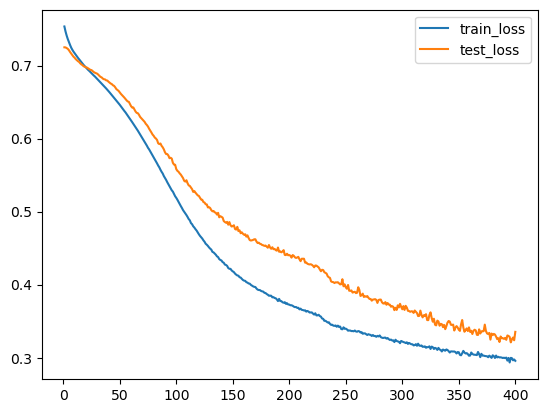

In [13]:
plt.plot(range(1,401),history.history["loss"],label="train_loss")
plt.plot(range(1,401),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [14]:
predicted=model.predict(X_test)
predicted

2/2 [==============================] - 0s 2ms/step


array([[1.46437660e-01],
       [9.94584382e-01],
       [9.97214317e-01],
       [2.18985826e-01],
       [8.78384769e-01],
       [7.26374388e-01],
       [8.63985792e-02],
       [9.44894791e-01],
       [7.82070994e-01],
       [1.04102075e-01],
       [9.91634429e-01],
       [9.02856875e-04],
       [9.99636829e-01],
       [3.75978313e-02],
       [6.29201625e-03],
       [1.01025201e-01],
       [9.67477441e-01],
       [3.43155742e-01],
       [9.50747073e-01],
       [9.84346449e-01],
       [9.99407589e-01],
       [9.93605912e-01],
       [4.61090207e-01],
       [4.26081806e-01],
       [9.06139910e-01],
       [9.07325596e-02],
       [2.95975269e-03],
       [2.01712325e-01],
       [9.81401920e-01],
       [7.04408228e-01],
       [1.66343331e-01],
       [1.15512649e-03],
       [1.36715844e-02],
       [9.98855650e-01],
       [9.98708606e-01],
       [6.50986552e-01],
       [9.77216423e-01],
       [9.99342978e-01],
       [6.90999985e-01],
       [9.27941799e-01],


#### converting the predicted probablities to the respective labels

In [15]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

#### evaluating the model 

0.82


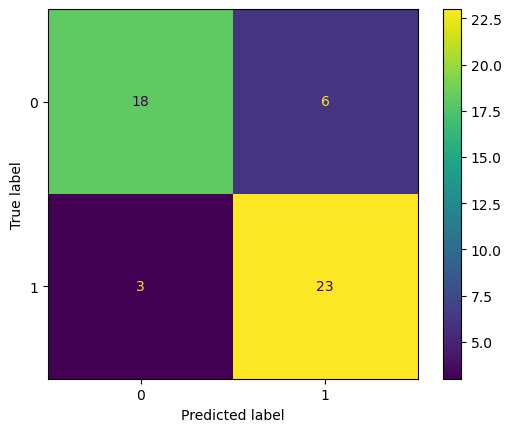

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [17]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 18s 2ms/step


<Axes: >

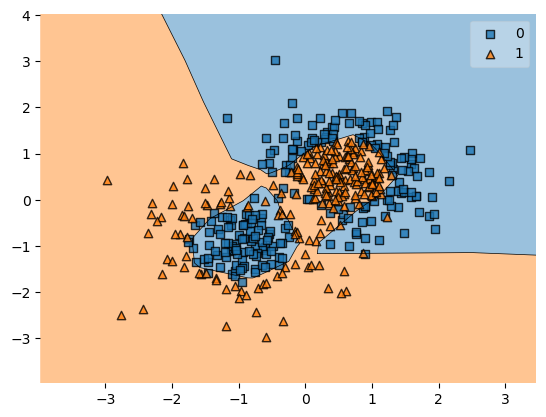

In [18]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 22s 2ms/step


<Axes: >

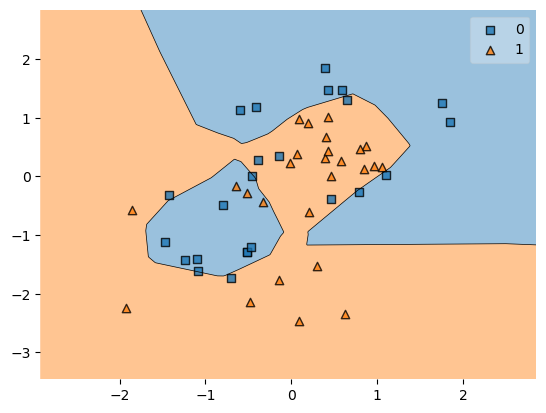

In [19]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model summary 


- This neural network model is showing accuracy of 82 percent
- We have used 2 hidden layers.
- In the First Hidden layers we have used 18 neurons,activation function as relu and kernel and bias regularizer L1 as 0.001.
- In the second hidden layers we have used 8 neurons,activation function as relu and kernel and bias regularizer L1 as 0.001.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.01. 
- No of epochs used for training this model is 400.